<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 04
## Clase 05: Clustering

## Objetivos

* Comprender el concepto de Aprendizaje No Supervisado
* Introducir algoritmos de _Clustering_.

## Contenidos
* [Aprendizaje No Supervisado](#unsupervised_learning)
* [Clustering](#clustering)
* [Implementación](#implementation)

<a id='unsupervised_learning'></a>

## Aprendizaje No Supervisado

En las últimas clases hemos aprendido técnicas de Machine Learning que pertenecen al __Aprendizaje Supervisado__, pues los datos vienen clasificados previamente, ya sea en un _Regresión_ que se posee el valor cuantitativo, como en _Clasificación_ donde se posee la etiqueta del registro. Con esto el algoritmo produce una función que establece una correspondencia entre las entradas y las salidas deseadas del sistema.

Mientras que el _Aprendizaje No Supervisado_ difiere del anterior en que los datos no vienen clasificados previamente. Aquí el sistema tiene que ser capaz de reconocer patrones para poder etiquetar las nuevas entradas. Es importante tener en consideración que estas etiquetas son artificiales, puede que no tengan ninguna interpretación!


![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fblog.westerndigital.com%2Fwp-content%2Fuploads%2F2018%2F05%2Fsupervised-learning-diagram-1024x569.jpg&f=1&nofb=1)

<a id='clustering'></a>

## Clustering

En palabras simples: agrupar registros **sin etiqueta previa**.

### Motivación

Buscaremos ilustrar los distintos algoritmos con datos reales. Un conjunto de datos interesante y **_versatil_** es el Iris Dataset.

**Recuerdo**: 
El conjunto de datos consiste en 50 muestras de 3 especies de Iris (Iris setosa, Iris virginica y Iris versicolor). 
Para cada flor, se midieron 4 características: largo y ancho de los petalos, y largo y ancho de los sépalos, en centímetros.

In [1]:
import altair as alt
from vega_datasets import data

alt.themes.enable('opaque')  # Para quienes utilizan temas oscuros en Jupyter Lab/Notebook

ThemeRegistry.enable('opaque')

In [2]:
iris_df = data.iris()
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


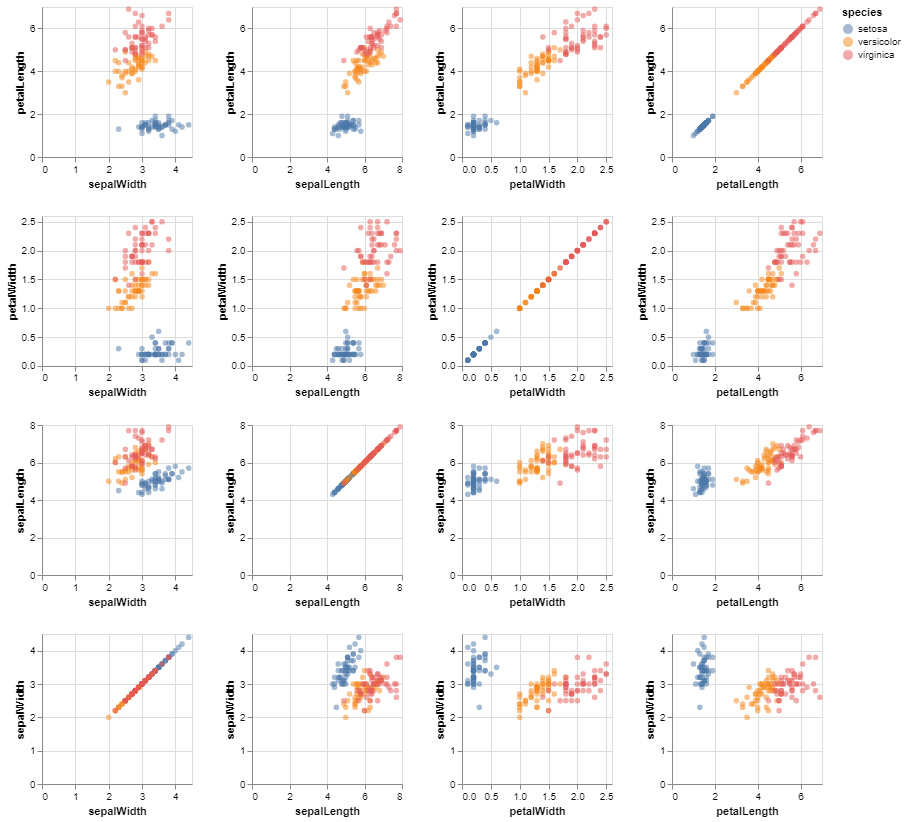

In [3]:
alt.Chart(iris_df).mark_circle(opacity=0.5).encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth'],
    column=['sepalWidth', 'sepalLength', 'petalWidth', 'petalLength']
)

**Pregunta de vital importancia para el desarrollo de la trama:**
¿Si no supiéramos que existen 3 tipos de Iris, seríamos capaces ***algorítmicamente*** de encontrar 3 tipos de flores?

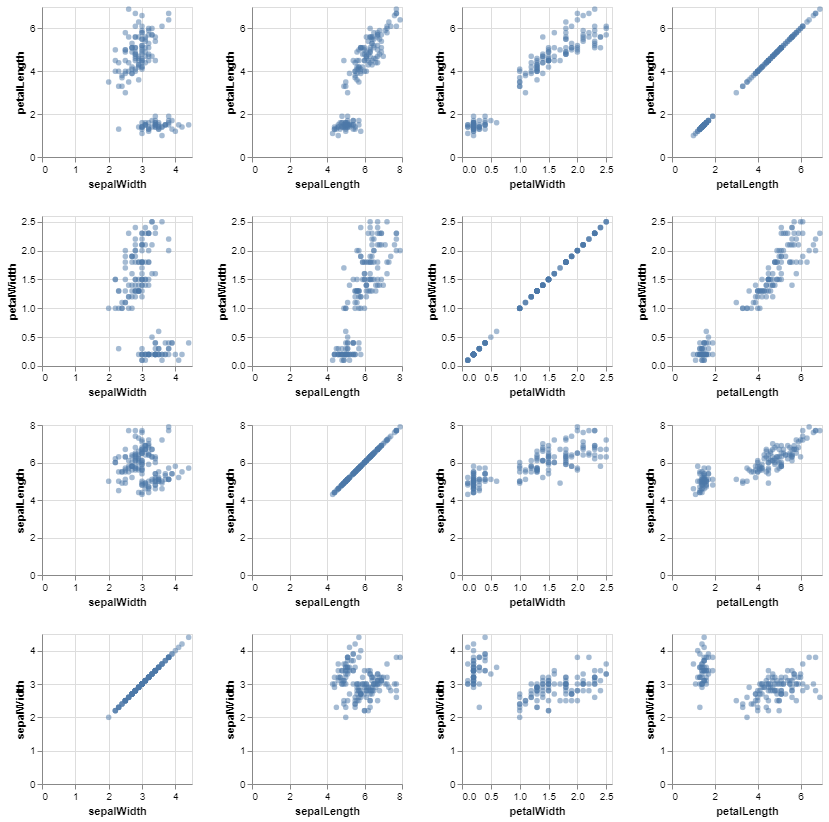

In [4]:
alt.Chart(iris_df).mark_circle(opacity=0.5).encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties(
    width=150,
    height=150
).repeat(
    row=['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth'],
    column=['sepalWidth', 'sepalLength', 'petalWidth', 'petalLength']
)

Para determinar que nos encontramos frente a un problema que necesita de un algoritmo de _Clustering_:

* Se tienen datos sin etiquetar/agrupar.
* Se busca obtener un agrupamiento "natural" de los datos.
* No existen ejemplos de los cuales aprender: **método sin supervisar**.
* Fácil de verificar por inspección visual en 2D y 3D. 
* Difícil de verificar en dimensiones superiores.

### Ejemplo de Problemas de Clustering

* **Segmentación de mercado**: 
  * ¿Cómo atendemos mejor a nuestros clientes?
* **Ubicación de centros de reabastacimiento**: 
  * ¿Cómo minimizamos tiempos de entrega?
* **Compresión de imágenes**: 
  * ¿Cómo minimizamos el espacio destinado al almacenamiento?


1. **Ubicación centros de reabastecimiento**

<img src="images/reabastecimiento2.png" width="500px" align="middle"/>

2. **Compresión de Imágenes**

    - Utilizando todos los colores:

    <img src="images/colores.png" width="500px" align="middle"/>

    - Utilizando únicamente 32 colores:

    <img src="images/colores_32means.png" width="500px" align="middle"/>

### Características de un Problema de Clustering

* **Datos de entrada**: Conjunto de inputs sin etiquetas.
* **Datos de salida**: Etiquetas para cada input.

**Observación**: La etiqueta/label típicamente se asocia a un entero (0,1,2, etc.) pero en realidad es cualquier variable categórica. 

### Algoritmos de Clustering
Buscan utilizar las propiedades inherentes presentes en los datos para organizarlos en grupos de máxima
similitud.

* Algoritmos basados en **conectividad**: Hierarchical Clustering.
* Algoritmos basados en **densidad**: Expectation Maximization
* Algoritmos basados en **centroides**: k-means.


## k-means

* **Input**: set $X$ de $N$ datos $x=(x_1, ..., x_n)$ y un hiper-parámetro $k$ con el número de clusters a crear.
* **Output**: Set de $k$ centroides de clusters ($\mu_l$) y una etiquetación de cada dato $x$ en $X$ indicando a qué cluster pertenece.

$x_i$ y $\mu_l$ son vectores en $\mathcal{R}^m$.

La pertenencia es única. Todos los puntos dentro de un cluster se encuentran mas
cercanos en distancia al centroide de su cluster que al centroide de otro cluster.



Matemáticamente:
\begin{align*}
\textrm{Minimizar } \sum_{l=1}^k \sum_{x_n \in C_l} ||x_n - \mu_l ||^2 \textrm{ respecto a } C_l, \mu_l. 
\end{align*}
Donde $C_l$ es el cluster l-ésimo.

El problema anterior es NP-hard (imposible de resolver en tiempo polinomial, del tipo más difícil de los probleams NP).



#### Algoritmo de Lloyd
Heurística que converge en pocos pasos a un mínimo local.

**Procedimiento**
* Calcular el centroide del cluster promediando las posiciones de los puntos actualmente en el cluster.
* Actualizar la pertenencia a los clusters utilizando la distancia más cercana a cada centroide.

__¿Cuándo funciona k-means?__

Cuando los clusters son bien definidos y pueden separarse por círculos (n-esferas) de igual tamaño.

<img src="images/kmeans1.png" width="600px" align="middle"/>

<img src="images/kmeans2.png" width="600px" align="middle"/>


<img src="images/kmeans3.png" width="400px" align="middle"/>

<img src="images/kmeans4.png" width="400px" align="middle"/>

__¿Cuándo falla k-means?__
* Cuando se selecciona mal el número $k$ de clusters.
* Cuando no existe separación clara entre los clusters.
* Cuando los clusters son de tamaños muy distintos.
* Cuando la inicialización no es apropiada.

<img src="images/kmeans4.png" width="400px" align="middle"/>

<img src="images/kmeans5.png" width="600px" align="middle"/>

<img src="images/kmeans6.png" width="600px" align="middle"/>

__Ventajas__
* Rápido y sencillo de programar

__Desventajas__
* Trabaja en datos continuos, o donde distancias y promedios pueden definirse.
* Heurística depende del puntos iniciales.
* Requiere especificar el número de clusters $k$.
* No funciona correctamente en todos los casos de clustering, incluso conociendo $k$ correctamente.

<a id='implementation'></a>

## Implementación

In [5]:
import numpy as np
import pandas as pd

from scipy.linalg import norm
from sklearn.datasets import make_blobs

In [6]:
def find_centers(X, k, seed=None):
    if seed is None:
        seed = 42
    np.random.seed(seed)
    # Initialize to K random centers
    old_centroids = random_centers(X, k)
    new_centroids = random_centers(X, k)
    while not has_converged(new_centroids, old_centroids):
        old_centroids = new_centroids
        # Assign all points in X to clusters
        clusters = cluster_points(X, old_centroids)
        # Reevaluate centers
        new_centroids = reevaluate_centers(X, clusters, k)
    return (new_centroids, clusters)


def random_centers(X, k):
    index = np.random.randint(0, X.shape[0], k)
    return X[index, :]


def has_converged(new_mu, old_mu, tol=1E-6):
    num = norm(np.array(new_mu)-np.array(old_mu))
    den = norm(new_mu)
    rel_error= num/den
    return rel_error < tol


def cluster_points(X, centroids):
    clusters = []
    for i, x in enumerate(X):
        distances = np.array([norm(x-cj) for cj in centroids])
        clusters.append( distances.argmin())
    return np.array(clusters)


def reevaluate_centers(X, clusters, k):
    centroids = []
    for j in range(k):
        cj = X[clusters==j,:].mean(axis=0)
        centroids.append(cj)
    return centroids

### Ejemplo con datos sintéticos

In [7]:
N = 1000
k = 4

In [8]:
X, y = make_blobs(
    n_samples=N,
    centers=k,
    random_state=42,
    cluster_std=0.60
)

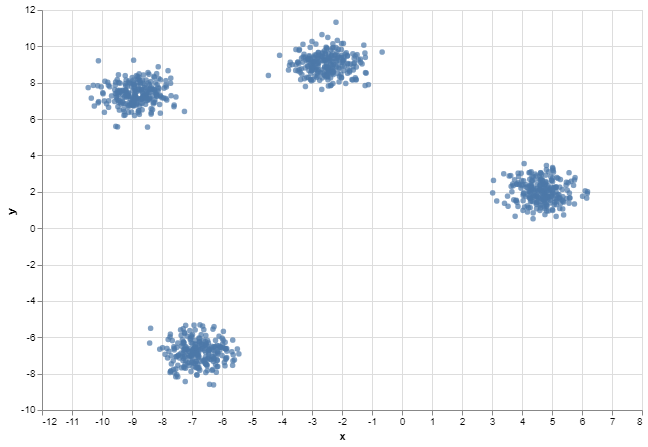

In [9]:
blobs = pd.DataFrame(X, columns=["x", "y"])
alt.Chart(blobs).mark_circle().encode(
    x="x",
    y="y"
).properties(
    width=600,
    height=400
)

Probando la implementación

In [10]:
centroids, clusters = find_centers(X, k=4, seed=42)

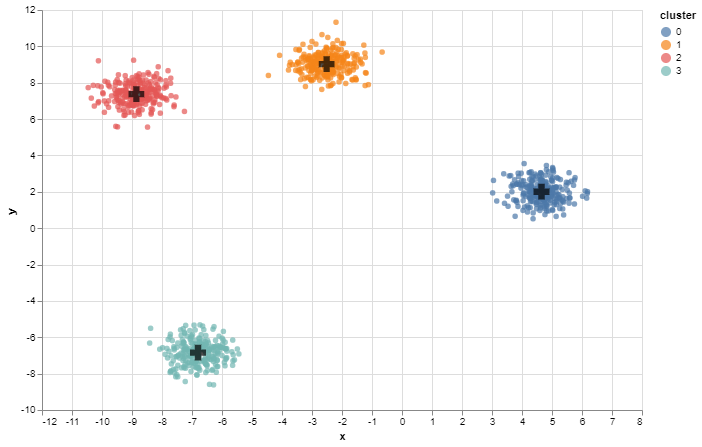

In [11]:
blobs["cluster"] = clusters
centroids_df = pd.DataFrame(centroids, columns=["x", "y"])

blobs_points = alt.Chart(blobs).mark_circle().encode(
    x="x",
    y="y",
    color="cluster:N"
).properties(
    width=600,
    height=400
)

blobs_centroids = alt.Chart(centroids_df).mark_point(size=250, fill="black", filled=True, fillOpacity=1, shape="cross").encode(
    x="x",
    y="y",
).properties(
    width=600,
    height=400
)

blobs_points + blobs_centroids

### Implementación de scikit-learn

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_
blobs["cluster"] = clusters
centroids_df = pd.DataFrame(centroids, columns=["x", "y"])

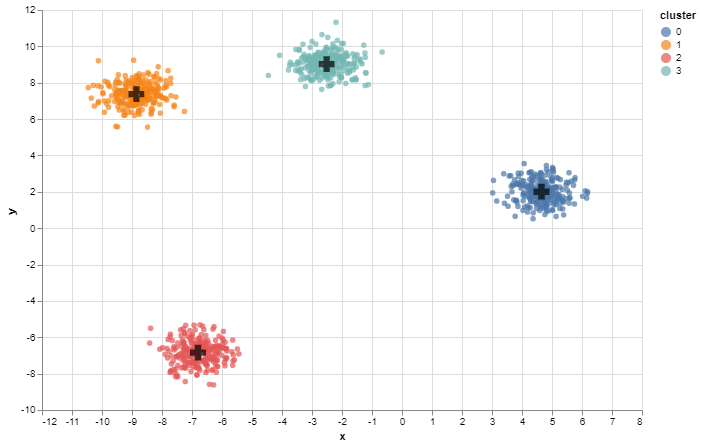

In [14]:
blobs_points = alt.Chart(blobs).mark_circle().encode(
    x="x",
    y="y",
    color="cluster:N"
).properties(
    width=600,
    height=400
)

blobs_centroids = alt.Chart(centroids_df).mark_point(size=250, fill="black", filled=True, fillOpacity=1, shape="cross").encode(
    x="x",
    y="y",
).properties(
    width=600,
    height=400
)

blobs_points + blobs_centroids

### Comparación

In [15]:
N = 100000
k = 6

In [16]:
X, y = make_blobs(
    n_samples=N,
    centers=k,
    random_state=42,
    cluster_std=0.60
)

In [17]:
%%timeit
centroids, clusters = find_centers(X, k=4, seed=42)

9.33 s ± 734 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

599 ms ± 51.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


No es sorprendente la verdad... No es necesario volver a inventar la rueda, pero si saber como funciona.

### Ejemplo Iris Dataset

Vamos a abusar un poco de este conjunto, pues ya conocemos su clasificación, pero es un buen ejemplo para probar un algoritmo de Clustering.

In [19]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix

In [20]:
# Parameters
n_clusters = 3

# Loading the data
iris = datasets.load_iris()
X_iris = iris.data
y_iris_true = iris.target

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X_iris)
y_pred = kmeans.labels_

In [21]:
# Show the classificacion report
cm = confusion_matrix(y_iris_true, y_pred)
print(cm)
print(f"\nAccuracy: {(np.diag(cm).sum() ) / float(cm.sum())}") # 16/100

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

Accuracy: 0.8933333333333333


¿Hay algo que te parece raro en esta matriz de confusión?

### Ejemplo Compresión de Imágenes

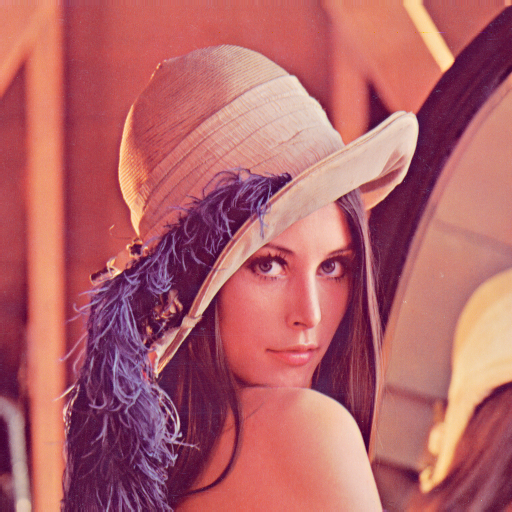

In [22]:
import os
from PIL import Image

# Load image
im = Image.open(os.path.join("images", "lena.tiff"))
im

In [ ]:
k = 8  # Number of clusters
X = np.array(im.getdata())  # Array with image values
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
compressed_array = kmeans.cluster_centers_[kmeans.predict(X)]  # Prediction 
im_compressed = compressed_array.astype(np.uint8).reshape(im.size[1], im.size[0], 3)  # New image
Image.fromarray(im_compressed, mode="RGB")